# **Music as Medicine**
Fall 2025 Data Science Project
##### *Authored by Meena R, Anika K, Nithika R, Nader A, Faith C, Madeline M*


### **Table of Contents**
I. Introduction - Faith C.

II. Data Curation - Faith C., Meena R.

III. Data Exploration - Meena R., Anika K., Nithika R., Nader A., Faith C., Madeline M.

IV. Primary Analysis - Meena R., Anika K., Nithika R., Nader A., Faith C., Madeline M.

V. Visualization - Anika K., Nader A., Meena R.

VI. Insights and Conclusions - Nithika R.

----------

Descriptions:

Meena R: Helped with data ingestion and cleaning, worked on model selection

Anika K: Proposed the dataset, helped with data ingestion and cleaning, visualized results

Nithika R: Helped with data ingestion and cleaning, wrote conclusion statements

Nader A: Helped with data ingestion and cleaning, visualized results, created tutorial

Faith C: Helped with data ingestion and cleaning, designed workflow, verbalized analysis

Madeline M: Helped with data ingestion and cleaning, worked model selection, performed the analysis


# I. Introduction

The purpose of our project is to apply the data science pipeline, including data curation, exploration, primary analysis, visualization, and interpretation, to extract meaningful insights from a dataset focused on participants' music listening habits and mental health. Ultimately, we aim to determine whether patterns in music listening behavior can meaningfully predict mental health outcomes in real-world contexts.

This work is important because mental health challenges are widespread and frequently underrecognized, and many individuals face barriers to seeking support. Since music is a deeply integrated part of daily life and often used as a form of emotional regulation, identifying predictive patterns in listening behavior may help inform earlier awareness, intervention strategies, and more accessible support systems.



# II. Data Curation


We begin by retrieving data from the MxMH dataset, which was created to examine the relationship between music listening and mental health.

Dataset citation: Monfared, Melissa. (2024). Mental Health and Music Relationship Dataset [Data set]. Kaggle. https://www.kaggle.com/code/melissamonfared/mental-health-music-relationship-analysis-eda/notebook

To prepare our data for the next step, we import the data and set up our pandas dataframe. Once the dataframe is set up, we can use df.head() to understand the features of our dataset. We see that, for the purposes of this project, the dataset primarily includes participants' self-reported frequency of listening to different music genres, categorized into five levels ranging from “never” to “Very frequently", as well as self-reported depression and anxiety scores on a scale from 0 to 10.


In [17]:
# import statements
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub

# import dataset from kaggle then use read_csv from pandas to store it in a variable called data
path = kagglehub.dataset_download("catherinerasgaitis/mxmh-survey-results")
data = pd.read_csv(path + "/mxmh_survey_results.csv")
data.head()

Using Colab cache for faster access to the 'mxmh-survey-results' dataset.


,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


 We then do some data cleaning by converting data "Timestamp" to a datetime object.

In [18]:
# converting data timestamp to a datetime object
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')

# we can also drop any NA rows
data = data.dropna()

# verifying set up and updated column values as it was already set up in part A
data.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
2,2022-08-27 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,2022-08-27 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,2022-08-27 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,2022-08-27 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,2022-08-27 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.


# III. Data Exploration

With our cleaned up data, we begin using hypothesis testing and analysis to draw helpful conclusions.

## Conclusion 1: Measuring anxiety, depression, OCD, and insomnia levels among upper age outliers






Before analyzing how music behavior relates to mental health, we first examined whether mental health scores vary among demographic outliers. This step helps us understand the distribution and diversity of mental health profiles within our dataset before connecting them to music behavior.

As illustrated by the histogram, reported levels of mental health conditions among upper outliers in Age vary by condition. Anxiety appears to be somewhat evenly distributed, with a mild right skew. Depression, and to an even greater extent OCD, skew right. While many subjects in the survey aged over 40 report low insomnia, there is a significant number of subjects reporting high levels of insomnia and a few in the middle.

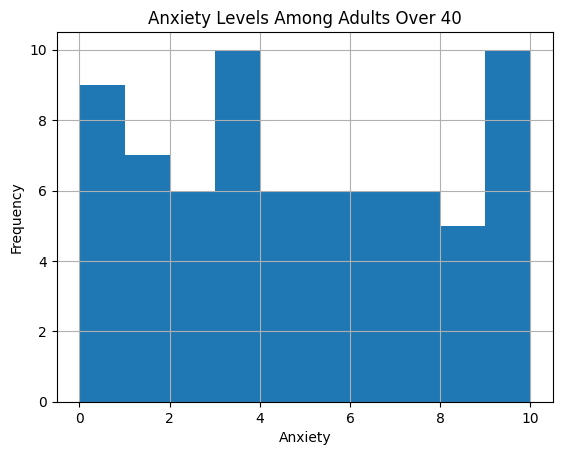

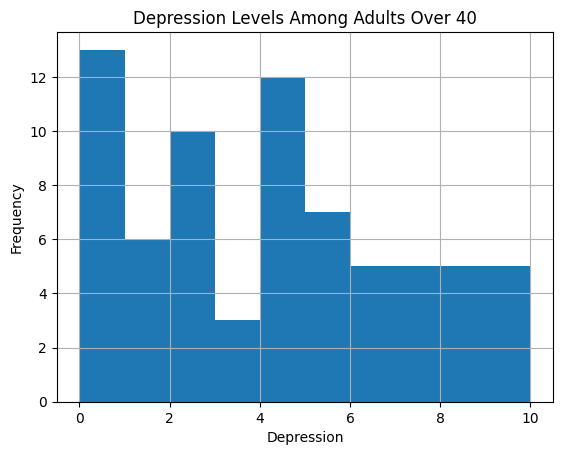

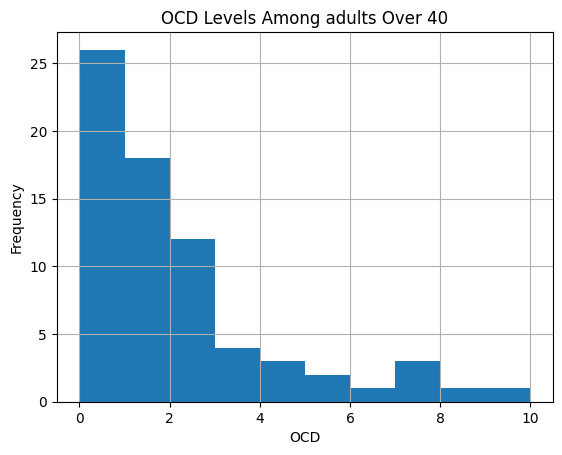

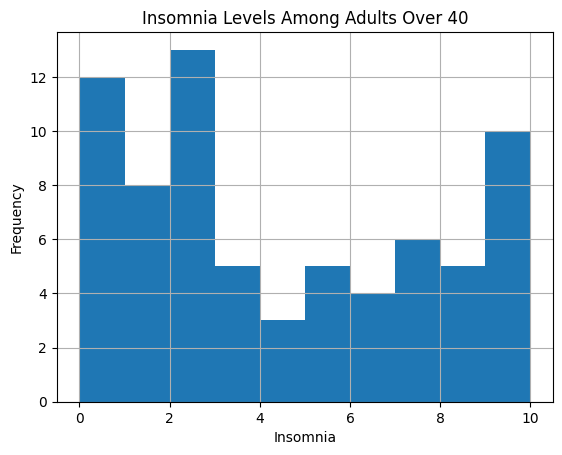

In [19]:
# Designating 1st and 3rd quartlies of dataset
quartile_1 = data['Age'].quantile(0.25)
quartile_3 = data['Age'].quantile(0.75)

# calculate IQR to get upper and lower bounds
iqr = quartile_3 - quartile_1
upper_bound = quartile_3 + iqr

# derive outliers greater than IQR
outliers = data[data['Age'] > upper_bound]
outliers

# Plot anxiety levels among outliers
outliers.hist(column = "Anxiety")
plt.title("Anxiety Levels Among Adults Over 40")
plt.xlabel("Anxiety")
plt.ylabel("Frequency")
plt.show()

# # Plot depression levels among outliers
outliers.hist(column = "Depression")
plt.title("Depression Levels Among Adults Over 40")
plt.xlabel("Depression")
plt.ylabel("Frequency")
plt.show()

# # Plot OCD levels among outliers
outliers.hist(column = "OCD")
plt.title("OCD Levels Among adults Over 40")
plt.xlabel("OCD")
plt.ylabel("Frequency")
plt.show()

# # Plot Insomnia levels among outliers
outliers.hist(column = "Insomnia")
plt.title("Insomnia Levels Among Adults Over 40")
plt.xlabel("Insomnia")
plt.ylabel("Frequency")
plt.show()


This confirms that mental health measures vary meaningfully within the population, necessary for predictive modeling, and alerts us to outlier subgroups that might influence model behavior.

## Conclusion 2: Hours of listening each day does have an effect on levels of depression



Building on our initial demographic findings, we next focused on a straightforward behavioral variable: how long participants listen to music each day and whether that relates to depression scores.

To see if there exists a corellation between number of hours the respondent listens to music per day and self-reported depression (on a scale of 0-10), we begin by presenting the null and alternative hypotheses:

HO: The number of hours respondent listens to music each day does not have an effect on the self-reported depression score.

HA: The number of hours respondent listens to music each day does have an effect on the self-reported depression score.

We can use the spearman correlation test to see if there is a correlation between the two variables.

In [20]:
# import statement
from scipy.stats import spearmanr

# use the spearmanr test to find correlation and p value
spearman_corr, spearman_p = spearmanr(data['Hours per day'], data['Depression'])
print("Spearman correlation:", spearman_corr)
print("p-value:", spearman_p)

Spearman correlation: 0.12334257902765537
p-value: 0.0021637638858593706


Text(0, 0.5, 'Depression Score')

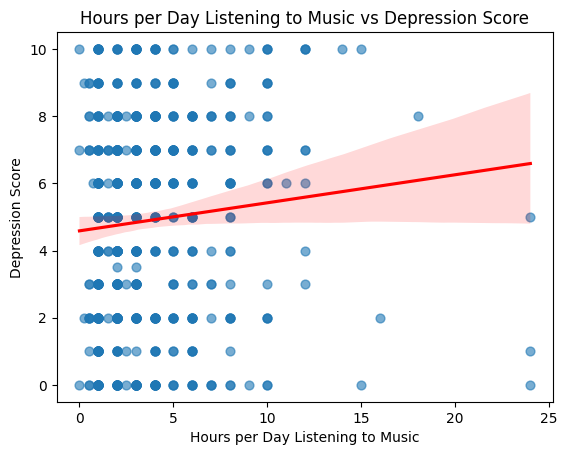

In [21]:
# import statements

import seaborn as sns
import matplotlib.pyplot as plt

# seaborn is a data visualization library (its built on top of typical Mathplotlib)
sns.regplot(
    x='Hours per day',
    y='Depression',
    data=data,
    scatter_kws={'alpha': 0.6, 's': 40},
    line_kws={'color': 'red'}
)

plt.title("Hours per Day Listening to Music vs Depression Score")
plt.xlabel("Hours per Day Listening to Music")
plt.ylabel("Depression Score")

Although the scatterplot shows no clear visual trend, the Spearman test indicates a statistically significant but very weak positive correlation (spearman correlation = 0.135, p-value = 0.0002).

When we create a scatter plot with a line of best fit, we see that the scatter plot shows a weak positive linear relationship between hours spent listening to music per day and depression scores. The red line of best fit slopes slightly upward, suggesting that individuals who listen to more music per day tend to report higher depression levels on average. However, the wide confidence band (shaded area) and large spread of data points suggest that this relationship is weak and highly variable, especially around high hours of listening outliers.


Overall, we can conclude that people who listen to more music per day tend to have slightly higher depression scores, but the relationship is not strong enough to suggest a meaningful connection such as causation.

This weak relationship motivates using a more complex model. Random Forests can capture non-linear relationships and interactions that simple correlations cannot detect.

## Conclusion 3: Favorite Genre and its effect on depression


Given the weak relationship between listening duration and depression, we extended our analysis to categorical listening preferences to see whether favorite genre played a larger role.

We used a Chi-square test of independence to analyse the relationships between the participants' favorite music genre and depression. The p-value was 0.468, which indicated that there is no statistically significant association between music genre preference and depression levels.

Chi2ContingencyResult(statistic=np.float64(139.06102248041455), pvalue=np.float64(0.3199187896405427), dof=132, expected_freq=array([[ 4.05333333,  1.96333333,  4.56      ,  2.72333333,  0.12666667,
         3.48333333,  2.97666667,  4.81333333,  5.06666667,  3.92666667,
         2.02666667,  2.28      ],
       [ 2.13333333,  1.03333333,  2.4       ,  1.43333333,  0.06666667,
         1.83333333,  1.56666667,  2.53333333,  2.66666667,  2.06666667,
         1.06666667,  1.2       ],
       [ 3.84      ,  1.86      ,  4.32      ,  2.58      ,  0.12      ,
         3.3       ,  2.82      ,  4.56      ,  4.8       ,  3.72      ,
         1.92      ,  2.16      ],
       [ 2.66666667,  1.29166667,  3.        ,  1.79166667,  0.08333333,
         2.29166667,  1.95833333,  3.16666667,  3.33333333,  2.58333333,
         1.33333333,  1.5       ],
       [ 3.41333333,  1.65333333,  3.84      ,  2.29333333,  0.10666667,
         2.93333333,  2.50666667,  4.05333333,  4.26666667,  3.30666667,
    

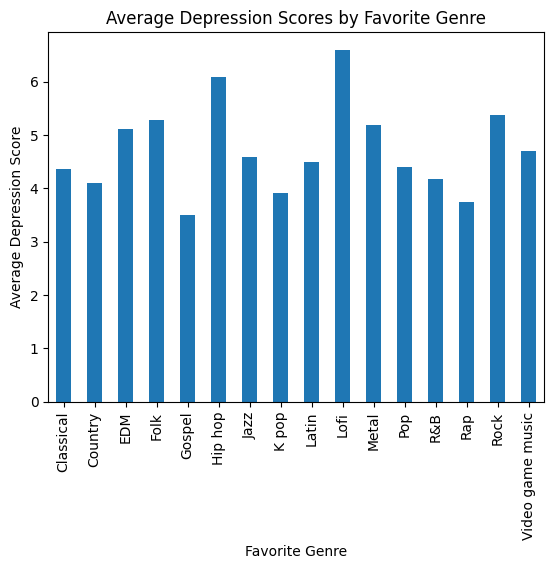

In [22]:
import scipy.stats

average_depression = data.groupby('Fav genre')['Depression'].mean()
avg_depression_graph = average_depression.plot(kind = 'bar')
avg_depression_graph.set_xlabel('Favorite Genre')
avg_depression_graph.set_ylabel('Average Depression Score')
avg_depression_graph.set_title('Average Depression Scores by Favorite Genre')

# since a bar graph of the average depression scores between groups of favorite genres reveals some
# variability, we could perform a chi square test for further analysis

cont_table = pd.crosstab(data["Fav genre"], data['Depression'])

cont_table = cont_table[cont_table.sum(axis=1) > 10] # filter out genres with low representation

chi2t = scipy.stats.chi2_contingency(cont_table)

chi2t

Overall, our exploratory analysis suggests that no single variable, whether age, listening time, or favorite genre, meaningfully predicts mental illnesses like depression on its own. This indicates that the relationship between music listening behavior and mental health is likely shaped by more complex patterns across multiple features.

# IV. Primary Analysis

## Using Random Forest to Predict Self-Reported Depression Levels Given Music Preferences



To uncover these deeper, non-linear relationships, we now turn to a Random Forest model that uses all genre listening frequencies together to predict depression levels.

We chose to use Random Forest because in our exploratory analysis we saw a weak linear relationship between individual features and scores of depression. Since music preference patterns can have non-linear interactions across different genres and behaviors, a tree model is good for looking at complex interactions rather than simple regression or correlation.

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

path = kagglehub.dataset_download("catherinerasgaitis/mxmh-survey-results")
data = pd.read_csv(path + "/mxmh_survey_results.csv")

# converting data timestamp to a datetime object
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')

# we can also drop any NA rows
data = data.dropna().reset_index(drop=True)

data.head()

Using Colab cache for faster access to the 'mxmh-survey-results' dataset.


,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,2022-08-27 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
1,2022-08-27 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
2,2022-08-27 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
3,2022-08-27 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
4,2022-08-27 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.


In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

# Feature Engineering frequencies into numerical values and a column for the average depression score based on favorite genre

frequency_map = { "Never": 0, "Rarely": 1, "Sometimes": 2, "Very frequently": 3}
print(data.columns)

# we use a for loop to make all the frequency columns numerical
for col in data.columns[11:27]:
    data[col] = data[col].map(frequency_map)
data.head()

genre_based_avg_depression = data.groupby('Fav genre')['Depression'].mean()
data['Fav Genre Avg Depression'] = data['Fav genre'].map(genre_based_avg_depression)

X = data.iloc[:,11:26].copy() # frequency of music listening
X['Fav Genre Avg Depression'] = data['Fav Genre Avg Depression']

# One Hot Encodign for Favorite Genre Column
encoder = OneHotEncoder(sparse_output=False)
encoded_df = pd.DataFrame(encoder.fit_transform(data[['Fav genre']]),
                          columns = encoder.get_feature_names_out(['Fav genre']),
                          index = data.index)
X = pd.concat([X, encoded_df], axis=1)

X['Hours Per Day'] = data['Hours per day']

y = data['Depression'].values # depression levels

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
regressor = RandomForestRegressor(n_estimators=300, random_state=42, oob_score=True, bootstrap=True)

regressor.fit(X_train, y_train)



Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')


RandomForestRegressor(n_estimators=300, oob_score=True, random_state=42)

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 9.220851136363637
R-squared: 0.004929331103678991


Since the Random Forest Regression analysis does not show a clear pattern or relationship between music genre and depression, let us look at another type of model. Given the Random Forest Regression was supervised machine learning method, we decided to see if genre preferences can be grouped via clustering, an unsupervissed machine learning method. We used Clustering by KMeans to see if there is a relationship between depression scores and music genre preferences.

As shown, the Elbow Plot does not demonstrate a clear "elbow" indicating an optimal k value is not evident from the intertia values. Since the range for an optimal value was around 3-4, we decided to use 3 for the number of clusters. We have printed the clusteroids and the average depression scores for each below!

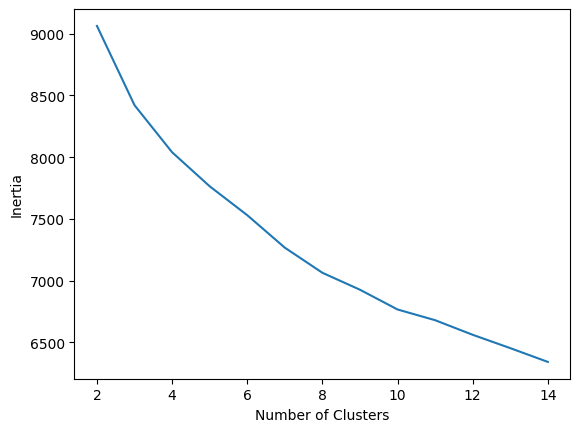

[[ 0.00458583 -0.1287962  -0.30189203 -0.16422846 -0.29275234 -0.77997425
  -0.37990547 -0.51021482 -0.41152479 -0.51350922  0.14854749 -0.50194056
  -0.74464317 -0.70160166  0.07492416 -0.05248693 -0.18912471]
 [ 0.20313287  0.54238173  0.30295357  0.78896019  0.43072177  0.47826674
   0.6267726   0.03978074  0.4738817   0.50423764  0.44671475  0.2640098
   0.43240279  0.41036306  0.52661214  0.29895583  0.23166189]
 [-0.22673624 -0.39095676  0.13126034 -0.60384933 -0.02086502  0.66850268
  -0.10045327  0.73272758  0.11303117  0.235254   -0.70914958  0.47755984
   0.6644018   0.62280272 -0.68364636 -0.24362706  0.03692968]]


,Depression
Cluster,
0,4.636538
1,5.597297
2,4.526316


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Clustering
X_cluster = data.iloc[:, 11:27].copy()
X_cluster['Hours Per Day'] = data['Hours per day']

scaler = StandardScaler()
X_cluster = scaler.fit_transform(X_cluster)

# determining the number of clusters using an elbow plot
y_vals = {}
for k in range(2, 15):
  model = KMeans(n_clusters=k, random_state=42)
  model.fit(X_cluster)
  y_vals[k] = model.inertia_

plt.plot(y_vals.keys(), y_vals.values())
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()
# the plot does not have a visible "elbow", just an approximate range from 3 to 6
# as such a value of 4 is chosen for the number of clusters

kmeans = KMeans(init = "random", n_clusters = 3, random_state = 42)
clusters = kmeans.fit_predict(X_cluster)
data['Cluster'] = kmeans.labels_

# we can print the centers for each our 4 clusters
print(kmeans.cluster_centers_)

data.groupby('Cluster')['Depression'].mean()

# V. Visualization

To visualize our Random Forest model, we made a scatter plot to compare the actual depression scores in the test dataset to the model's predictions. Each point represents one participant and the red dashed line shows where the points would be if the predictions were perfect.

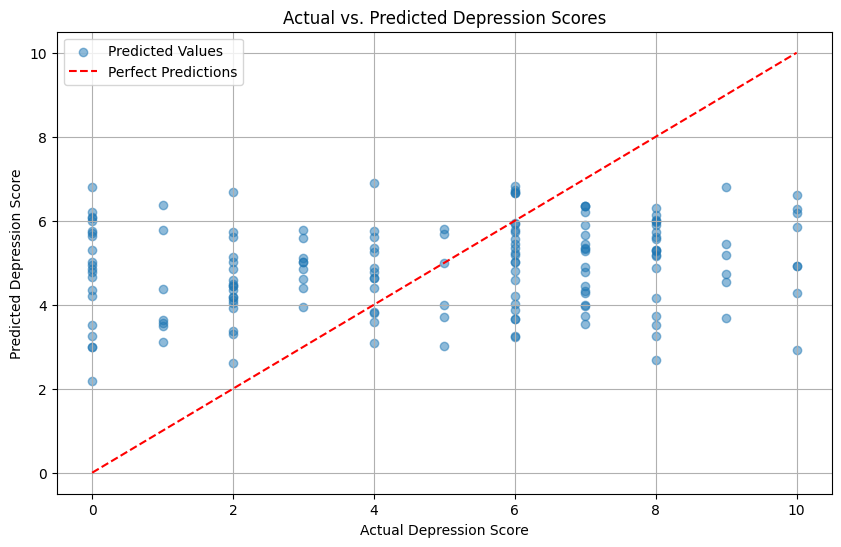

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label="Predicted Values")

plt.plot([0,10], [0,10], color='red', linestyle='--', label="Perfect Predictions")
plt.xlabel("Actual Depression Score")
plt.ylabel("Predicted Depression Score")
plt.title("Actual vs. Predicted Depression Scores")
plt.legend()
plt.grid(True)
plt.show()

From the scatter plot, we can see that the points are pretty scattered and spread out, rather than following the line closely. This shows us that the model both overestimates and underestimates scores of depression. Since there are no clusters, this means that there is a weak relationship between between music listening habits and depression scores.

Overall, the scatter plot supports our earlier findings of low R^2 and high MSE, which shows that frequency of listening to music does not predict depression levels.

Next let us look at our clustering analysis using a scatter plot. Before plotting, we used Principal Component Analysis, a dimensionality reduction technique, to reduce the dimensions of the data to 2 principal components. This ensures that our dataset has 2 dimensions for plotting!

The final scatter plot shows 3 distinct clusters. While the clusters are somewhat visually distinguishable, they are not clearly distant from each other on the scatter plot. This shows that the features used do not create distinct suggesting a lack of correlation between music preference and depression scores.

As such, both the Random Forest Regression analysis above and Clustering Visualization here show that there is a weak or no significant relationship between self-reported depression levels and music preferences.

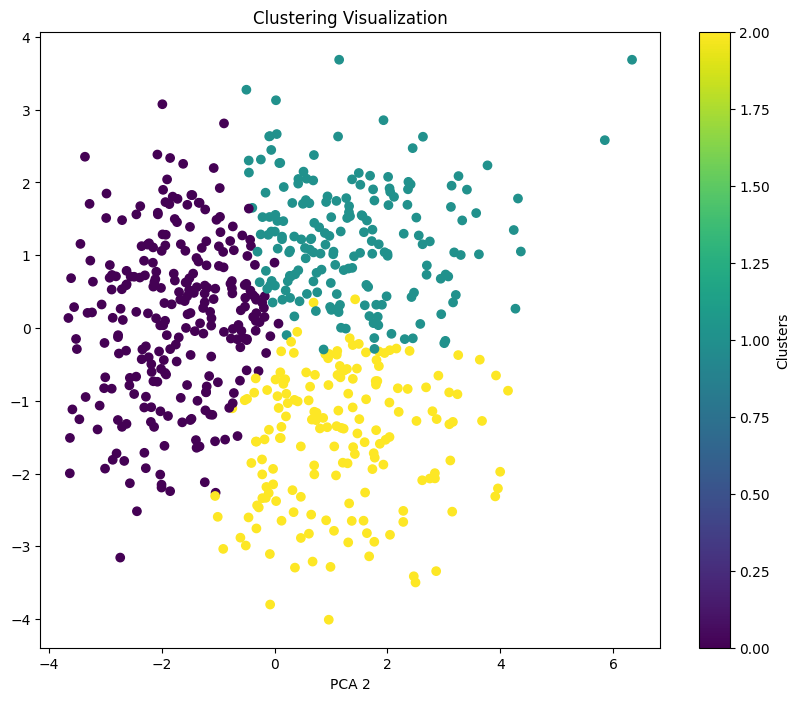

In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# plotting clustering data

pca = PCA(n_components = 2)
new_X = pca.fit_transform(X_cluster)

plt.figure(figsize = (10, 8))
plt.scatter(new_X[:, 0], new_X[:, 1], c=clusters)
plt.xlabel('PCA 1')
plt.xlabel('PCA 2')
plt.title('Clustering Visualization')
plt.colorbar(label = 'Clusters')

# VI. Insights and Conclusions

After reading through the project, does an uninformed
reader feel informed about the topic? Would a reader who already knew about the
topic feel like they learned more about it?

Answer: The uninformed reader will feel informed about the topic because in our analysis we discussed how the different types of musical habits/behaviors might relate to mental health in the slightest. Even a reader who already knows about the topic could learn something new because our analysis shows that the frequency of music by itself is not a strong predictor of depression scores, which poses as a challenge to the relationship between music and mental health. While music habits/behaviors are interesting to analyze, they are limited in predicting mental health outcomes based on the data in our datset.